# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_file('ealaxi/paysim1',file_name='PS_20174392719_1491204439457_log.csv',path='data/')

False

In [3]:
df=pd.read_csv('data/PS_20174392719_1491204439457_log.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
'''
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
'''

'\nstep - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).\n\ntype - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.\n\namount - amount of the transaction in local currency.\n\nnameOrig - customer who started the transaction\n\noldbalanceOrg - initial balance before the transaction\n\nnewbalanceOrig - new balance after the transaction\n\nnameDest - customer who is the recipient of the transaction\n\noldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).\n\nnewbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).\n\nisFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='isFraud', ylabel='amount'>

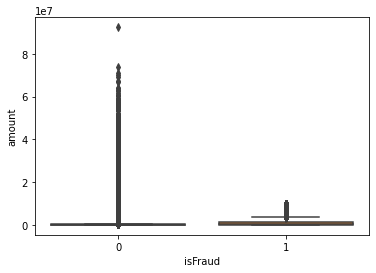

In [8]:
sns.boxplot(data=df, x='isFraud',y='amount')

In [9]:
# El outcome será "isFraud"

### What is the distribution of the outcome? 

<AxesSubplot:xlabel='isFraud', ylabel='count'>

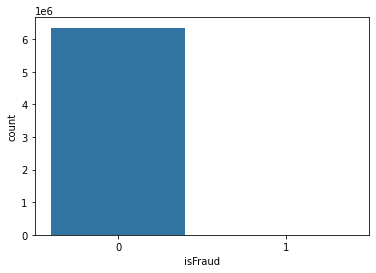

In [10]:
sns.countplot(data=df,x='isFraud') #Hay muchos más datos de NOT FRAUD que de FRAUD

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [11]:
df['step'].unique()
#No es apropiado porque no da información para la clasificación

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
#convierto steps en dias de la semana y en horas
num_days = 7
num_hours = 24
df['days'] = df.step % num_days
df['hours'] = df.step % num_hours


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  days            int64  
 12  hours           int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 631.1+ MB


In [14]:
#One Hot Encadore para days & hours
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(drop='first',sparse=False).fit_transform(df[['days']])
OneHotEncoder(drop='first',sparse=False).fit_transform(df[['hours']])

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Run a logisitc regression classifier and evaluate its accuracy.

In [15]:
#Prepare data
X=df.select_dtypes(include=np.number).drop(['step','isFraud'],axis=1)
y=df['isFraud']

In [17]:
#rebalanceo conjunto de entrenamiento
import imblearn
from imblearn.under_sampling import RandomUnderSampler

X_res, y_res = RandomUnderSampler().fit_resample(X,y)
#Así se balancea 50/50 los datos

In [18]:
#Creo conjunto de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [20]:
feature_engineering=make_column_transformer((OneHotEncoder(drop='first'),['days','hours']))

In [21]:
pipe = make_pipeline(feature_engineering, LogisticRegression())

In [22]:
pipe.fit(X_res, y_res)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['days', 'hours'])])),
                ('logisticregression', LogisticRegression())])

In [36]:
y_pred=pipe.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74      1649
           1       0.79      0.50      0.61      1637

    accuracy                           0.69      3286
   macro avg       0.71      0.68      0.67      3286
weighted avg       0.71      0.69      0.67      3286



In [38]:
#Accuracy del 69%

0.6911603555339096

### Now pick a model of your choice and evaluate its accuracy.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
pipe = make_pipeline(feature_engineering, DecisionTreeClassifier())

In [41]:
pipe.fit(X_res, y_res)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['days', 'hours'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [42]:
y_pred=pipe.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      1649
           1       0.78      0.60      0.68      1637

    accuracy                           0.72      3286
   macro avg       0.73      0.72      0.71      3286
weighted avg       0.73      0.72      0.71      3286



### Which model worked better and how do you know?

In [44]:
#Es mejor el segundo modelo (DecisionTreeClassifier) porque tiene una mayor accuracy (72%)